(506, 13)
(506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
    

C:\Users\darin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

(array([0.00527009, 0.00922266, 0.01317523, 0.0171278 , 0.01581028,
        0.03952569, 0.03689065, 0.02898551, 0.04216074, 0.0685112 ,
        0.06719368, 0.06719368, 0.06587615, 0.03030303, 0.01449275,
        0.02108037, 0.01844532, 0.01449275, 0.01976285, 0.00790514,
        0.01185771, 0.00790514, 0.00131752, 0.00131752, 0.00395257,
        0.00527009, 0.00395257, 0.00263505, 0.00131752, 0.02371542]),
 array([ 5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. , 18.5, 20. ,
        21.5, 23. , 24.5, 26. , 27.5, 29. , 30.5, 32. , 33.5, 35. , 36.5,
        38. , 39.5, 41. , 42.5, 44. , 45.5, 47. , 48.5, 50. ]),
 <BarContainer object of 30 artists>)

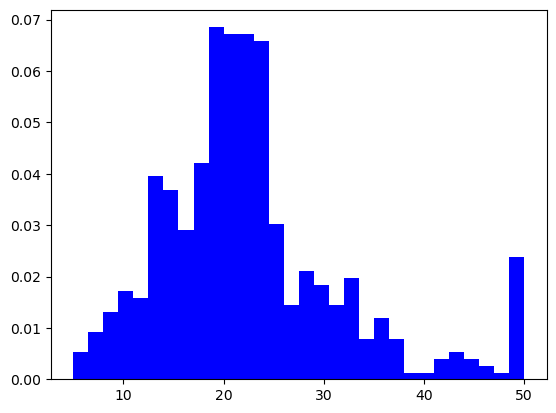

In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
boston = load_boston()
x = boston.data
y = boston.target
print(x.shape)
print(y.shape)
print(boston.DESCR)
print(type(boston))
plt.hist(y, bins=30, color='b', density=True, stacked=True)


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

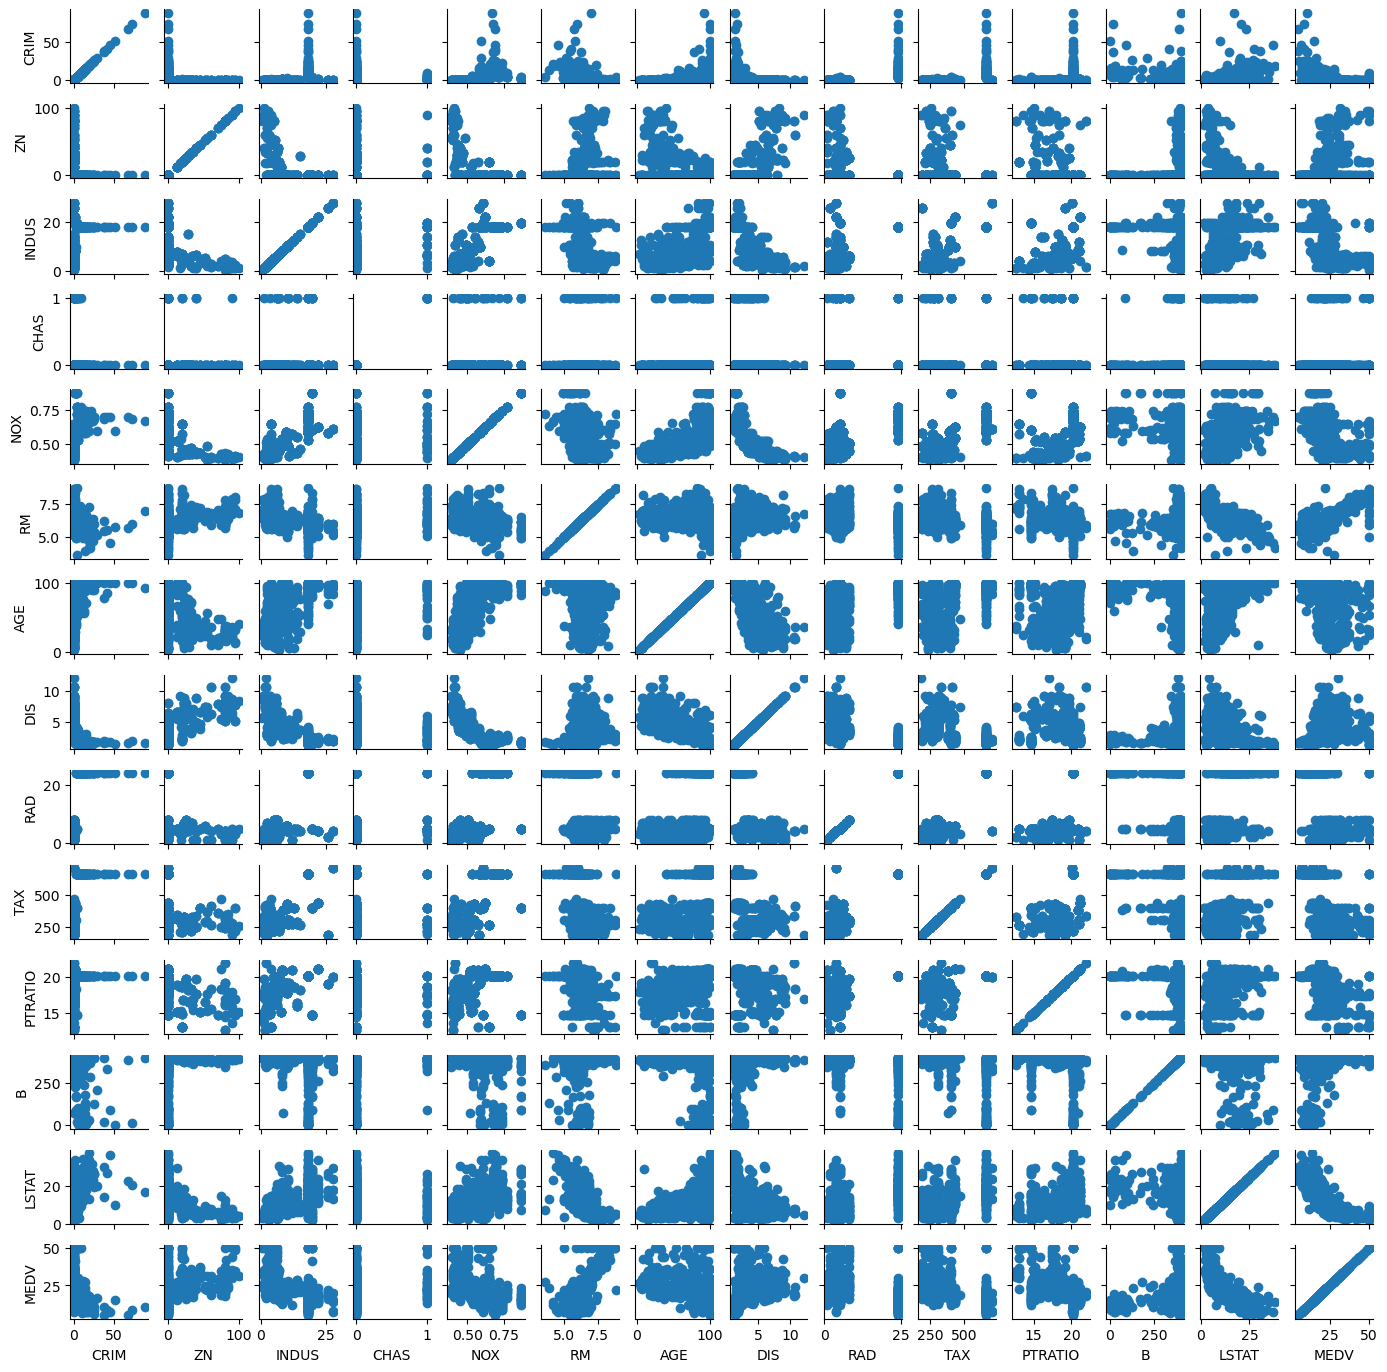

<AxesSubplot:>

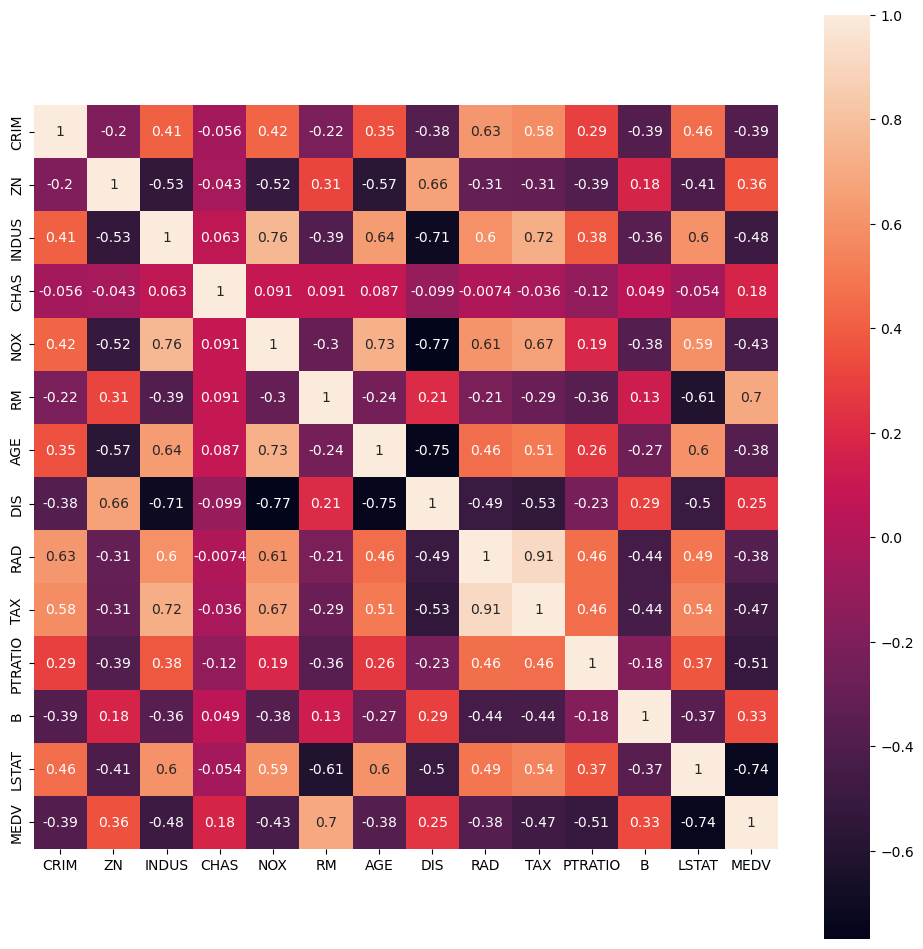

In [2]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame(x,columns=boston.feature_names)
df['MEDV'] = pd.Series(y)
print(df)
g = sns.PairGrid(df,height=1)
g.map(plt.scatter)
plt.show()
fig=plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),vmax=1,square=True,annot=True)


In [3]:
#sklearn model training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(x,columns=boston.feature_names),pd.
Series(y),test_size=0.1,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_train,y_train)
print(linear_reg.coef_)
linear_reg_predict = linear_reg.predict(x_test)
print('The mean squared error and r^2 values for the linear regression prediction is')
print(mean_squared_error(y_test, linear_reg_predict))
print(r2_score(y_test, linear_reg_predict))

(455, 13)
(51, 13)
(455,)
(51,)
[-1.16259926e-01  5.56061815e-02  2.42066570e-03  2.58498034e+00
 -1.91474547e+01  3.54362973e+00 -5.86296897e-04 -1.59321860e+00
  3.16227116e-01 -1.20965602e-02 -9.20798781e-01  8.75217941e-03
 -5.18191990e-01]
The mean squared error and r^2 values for the linear regression prediction is
20.5442746593258
0.7786386580298913


In [4]:
#urllib
import urllib.request
#headers are not included here
urr = urllib.request.urlopen('https://www.port.ac.uk/')
content = urr.read()
urr.close()
html = content.decode()
print(html)

<!DOCTYPE html>
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
  <head>
    <meta charset="utf-8" /><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-bc19bebe531145cd872",applicationID:"507611046"};;(()=>{var __webpack_modules__={507:(__unused_webpack_module,__webpack_exports__,__webpack_require__)=>{"use strict";function detectPolyfillFeatures(){const featureStatus={};return checkAndAddFeature("Promise","PROMISE"),checkAndAddFeature("Array.prototype.includes","ARRAY_INCLUDES"),checkAndAddFeature("Object.assign","OBJECT_ASSIGN"),c

In [5]:
#requets.get
import requests
rer = requests.get('https://www.port.ac.uk/')
print(rer.status_code)
html = rer.text
print(html)

200
<!DOCTYPE html>
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
  <head>
    <meta charset="utf-8" /><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-bc19bebe531145cd872",applicationID:"507611046"};;(()=>{var __webpack_modules__={507:(__unused_webpack_module,__webpack_exports__,__webpack_require__)=>{"use strict";function detectPolyfillFeatures(){const featureStatus={};return checkAndAddFeature("Promise","PROMISE"),checkAndAddFeature("Array.prototype.includes","ARRAY_INCLUDES"),checkAndAddFeature("Object.assign","OBJECT_ASSIGN

In [6]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
"""
#you will need to install the lxml parser with $ pip install lxml
from bs4 import BeautifulSoup as bs
import re
soup = bs(html_doc, 'lxml')
print(soup.prettify())
for link in soup.find_all('a'):
 print(link.get('href'))
print(soup.get_text())
for tag in soup.find_all(re.compile("^b")):
 print(tag.name)

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>
http://example.com/elsie
http://example.com/lacie
http://example.com/tillie
The Dormouse's story

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...

body
b


In [7]:

import json
import requests
"""
api_key = "b9f52e1d80eb0600d2b456b42987e516"
lat = "50.82056646780895"
lon = "-1.0826543197735303"
url = "https://api.openweathermap.org/data/2.5/onecall?lat=%s&lon=%s&appid=%s&units=metric" % (lat, lon, api_key)

response = requests.get(url)
data = json.loads(response.text)
#print(data)
current = current = data["current"]["temp"]
print(current)
"""

'\napi_key = "b9f52e1d80eb0600d2b456b42987e516"\nlat = "50.82056646780895"\nlon = "-1.0826543197735303"\nurl = "https://api.openweathermap.org/data/2.5/onecall?lat=%s&lon=%s&appid=%s&units=metric" % (lat, lon, api_key)\n\nresponse = requests.get(url)\ndata = json.loads(response.text)\n#print(data)\ncurrent = current = data["current"]["temp"]\nprint(current)\n'

In [2]:
import requests
import json
import re
req = requests.get('https://www.port.ac.uk/study/subject-area/computing')
print(req.status_code)
html = req.text
print(html)
reS = '<a href=.*>(.*?)</a>'
pattern = re.compile(reS)
s = pattern.findall(html)

200
<!DOCTYPE html>
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
  <head>
    <meta charset="utf-8" /><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-bc19bebe531145cd872",applicationID:"507611046"};;(()=>{var __webpack_modules__={507:(__unused_webpack_module,__webpack_exports__,__webpack_require__)=>{"use strict";function detectPolyfillFeatures(){const featureStatus={};return checkAndAddFeature("Promise","PROMISE"),checkAndAddFeature("Array.prototype.includes","ARRAY_INCLUDES"),checkAndAddFeature("Object.assign","OBJECT_ASSIGN

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

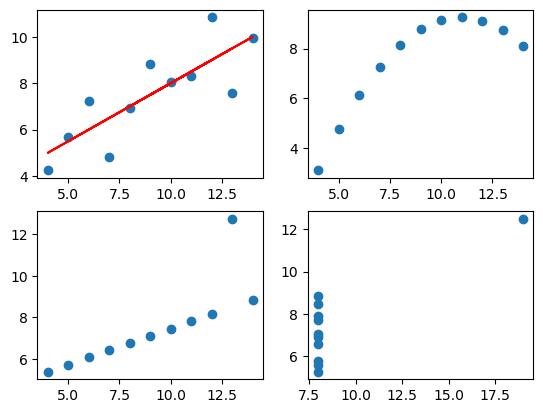

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
anscombe = sns.load_dataset("anscombe")
print(anscombe)
"""
# create subsets and subplots of the anscombe data
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2= anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']
fig = plt.figure()
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')
"""
dataset_1 = anscombe[anscombe['dataset'] ==]
#linear regression model
regr = linear_model.LinearRegression()
regr.fit(dataset_1['x'].values.reshape(-1,1), dataset_1['y'].values.reshape(-1,1))
axes1.plot(dataset_1['x'].values.reshape(-1,1), regr.predict(dataset_1['x'].values.reshape(-1,1)), 'r')
plt.show()
